In [1]:
import sys
sys.path.append("/Users/hhg/Research/kinematic_lensing/code/BinnedFit/")
import time

In [2]:
import numpy as np
import os
import copy
from astropy.io import fits
import galsim
from scipy.interpolate import interp1d
from scipy.ndimage.interpolation import rotate
import tfCube
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
pars = tfCube.getParams(redshift = 0.2)
pars['type_of_observation'] = 'slit'
# to make things practical during testing, increase the spaxel size.
pars['g1'] = 0.0
pars['g2'] = 0.0
pars['nm_per_pixel'] = 0.025
pars['expTime'] = 10000.
pars['pixScale'] = 0.032
pars['Resolution'] = 5000
pars['sini'] = 1.
pars['aspect'] = 0.2
pars['vcirc'] = 200.
pars['area'] = 3.14*(1000./2.)**2
pars['linelist']['flux'][pars['linelist']['species'] == 'Halpha'] = 6e-24
pars['norm'] = 1e-26
pars['lambda_min'] = (1 + pars['redshift']) * pars['linelist']['lambda'][pars['linelist']['species'] == 'Halpha'] - 2
pars['lambda_max'] = (1 + pars['redshift']) * pars['linelist']['lambda'][pars['linelist']['species'] == 'Halpha'] + 2

pars['knot_fraction']=0.

lines = pars['linelist']
pars['half_light_radius'] = 0.5

pars['slitAngles'] = np.array([0.])#np.linspace(-np.pi/4., np.pi/2., 3)
pars['slitWidth']  = 0.1
pars['slitOffset'] = 0.0
# define some fiber parameters
#nfiber = 5
#r_off = 1.5
pars['fiber_size'] = 1.0
pars['psfFWHM'] = .25
pars['vscale'] = pars['half_light_radius']
pars['ngrid'] = 256
pars['image_size'] = 128

extent =  pars['image_size'] * pars['pixScale']
subGridPixScale = extent*1./pars['ngrid']

# turned off continuum
pars['add_continuum']=0

In [4]:
lines['flux']

array([2.e-25, 2.e-25, 2.e-25, 2.e-25, 6.e-24])

In [4]:
starting_time = time.time()

aperture = galsim.Image(pars['ngrid'], pars['ngrid'],scale=subGridPixScale)
obsLambda, obsGrid, modelGrid, skyGrid = tfCube.getTFcube(pars,aperture,[0.,0.])

print("total time cost:",time.time()-starting_time,"(sec)")

returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total time cost: 4.838227987289429 (sec)


In [5]:
pars['slitOffset'] = 0.0
pars['slitWidth']  = 0.1
data0 = tfCube.getSlitSpectra(data=modelGrid,pars=pars)
data0 = data0[0]
data0.shape

(256, 160)

In [6]:
saveDir = "/Users/hhg/Research/kinematic_lensing/code/BinnedFit/notebook/data/"
fname_out = "mock2DSpec_sini{:.1f}_sW{:.1f}_sOff{:.1f}.npy".format(pars['sini'],pars['slitWidth'],pars['slitOffset'])
np.save(saveDir+fname_out,data0)

In [7]:
np.save(saveDir+'obsLambda.npy',obsLambda)

In [8]:
extent

4.096

In [9]:
subGridPixScale

0.016

## plot mock data

In [10]:
data0 = np.load(saveDir+fname_out)

In [11]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/binnedFit_utilities.py

lambda0 = 656.461
redshift = 0.2
v_obs = lambda_to_velocity(lambda0,redshift,obsLambda) ; v_min = np.min(v_obs) ; v_MAX=np.max(v_obs)

extent = pars['image_size'] * pars['pixScale']
subGridPixScale = extent*1./pars['ngrid']
pos_grid = np.arange(-extent/2., extent/2., subGridPixScale) ; x_min=np.min(pos_grid) ; x_MAX=np.max(pos_grid)

In [12]:
v_obs.shape

(160,)

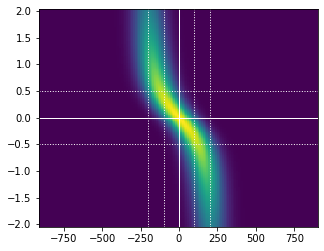

In [13]:
#%matplotlib
%matplotlib inline

ncol=1

fig,ax = plt.subplots(1,ncol,figsize=(5,4))
ax.imshow(data0,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto')

vcen = 0.

ax.axhline(y=0.0,color='white', linestyle='-',lw=1)
ax.axhline(y=0.5,color='white', linestyle=':',lw=1)
ax.axhline(y=-0.5,color='white', linestyle=':',lw=1)
ax.axvline(x=vcen,color='white', linestyle='-',lw=1)
ax.axvline(x=vcen+100,color='white', linestyle=':',lw=1)
ax.axvline(x=vcen-100,color='white', linestyle=':',lw=1)
ax.axvline(x=vcen+200,color='white', linestyle=':',lw=1)
ax.axvline(x=vcen-200,color='white', linestyle=':',lw=1)
    
#ax.set_xlim(-220,220)
#ax.set_ylim(-1.5,1.5)


plt.show()